# Importing libraries

In [ ]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor


# loading and understanding the data using pandas

In [ ]:
housing = datasets.fetch_california_housing()

In [ ]:
housing_df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
housing_df['target'] = housing.target

In [ ]:
housing_df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

In [ ]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Preprocessing the data

In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
housing_df.duplicated().sum()

0

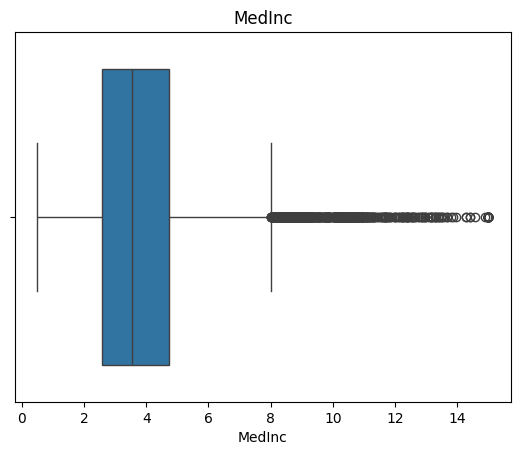

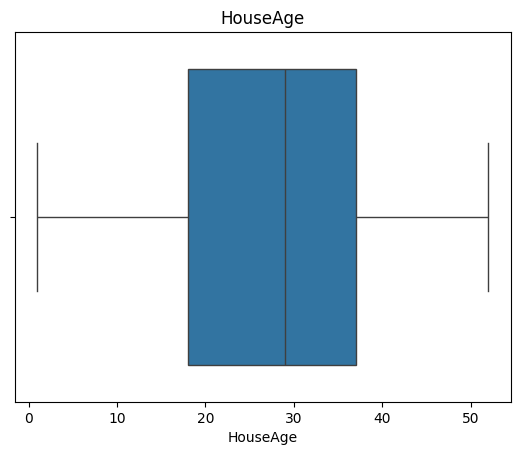

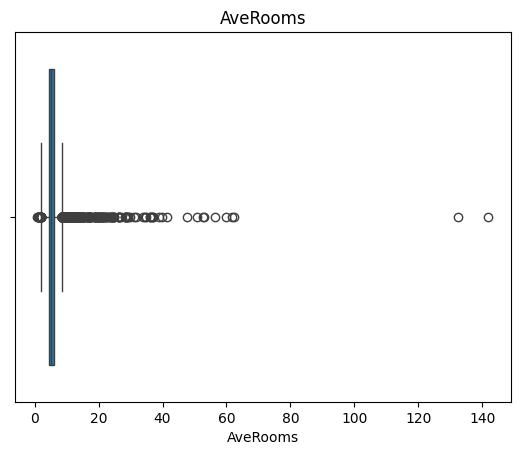

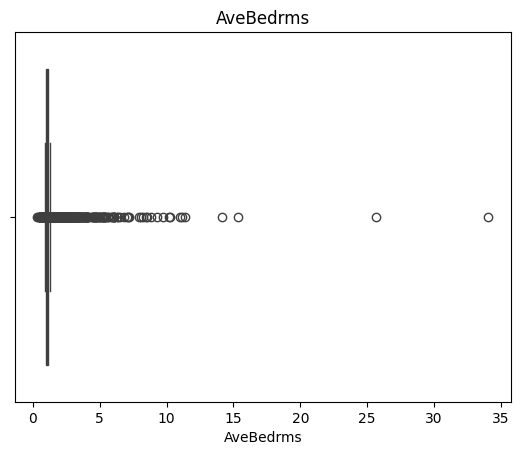

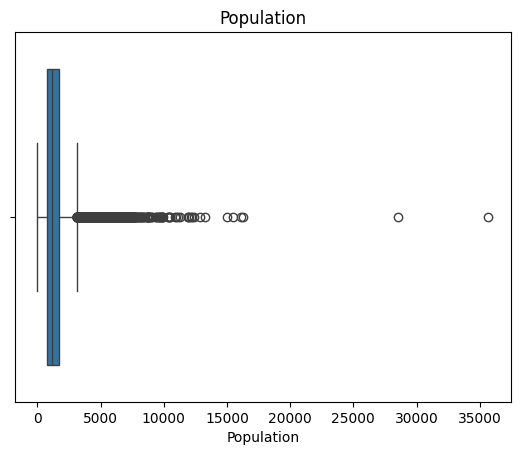

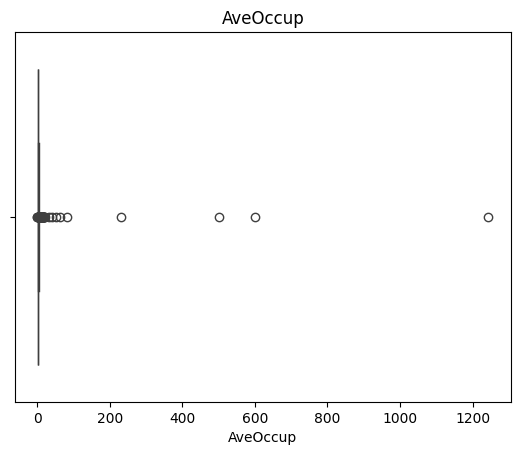

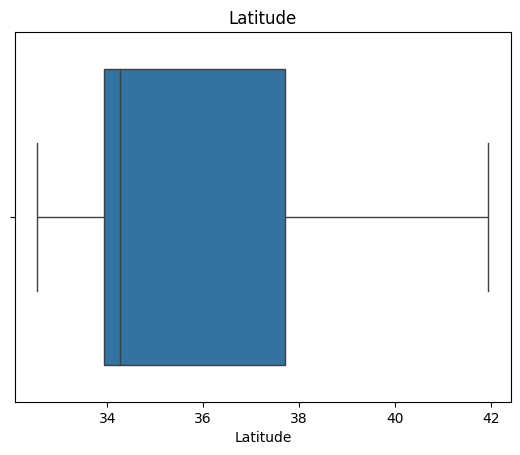

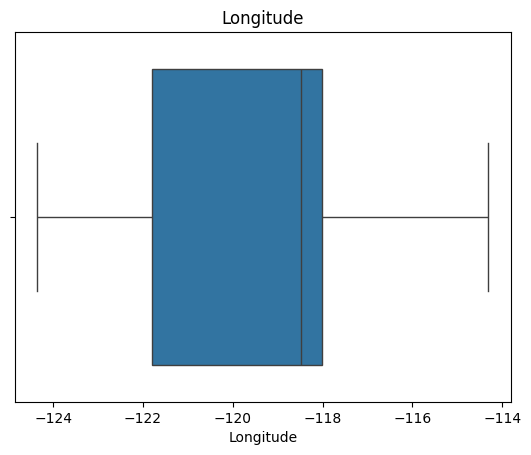

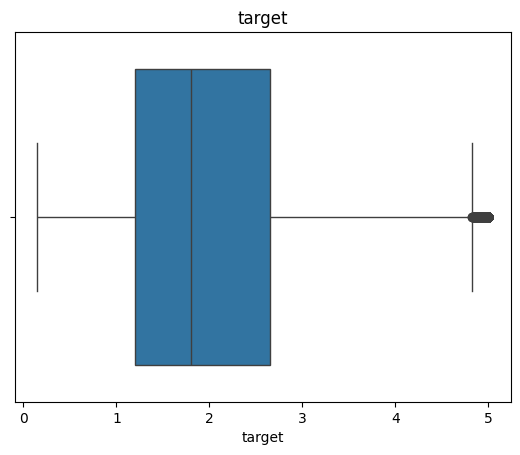

In [ ]:
for column in housing_df.columns:
    plt.figure()  # Create a new figure for each plot
    sns.boxplot(x=housing_df[column])
    plt.title(column)
    plt.show()

In [ ]:
housing_df = housing_df[housing_df['MedInc'] <= 8]
housing_df = housing_df[housing_df['AveRooms'] <= 12]
housing_df = housing_df[housing_df['AveBedrms'] <= 4]
housing_df = housing_df[housing_df['Population'] <= 3000]
housing_df = housing_df[housing_df['AveOccup'] <= 10]


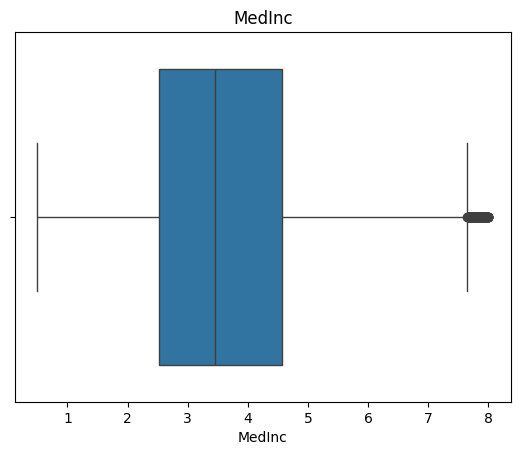

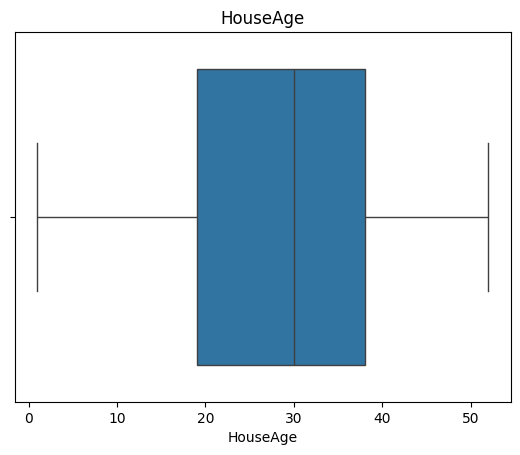

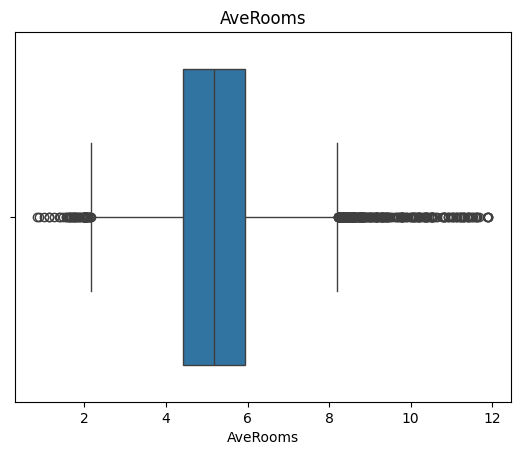

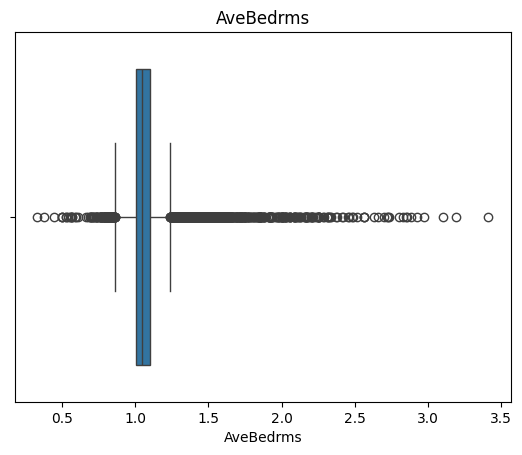

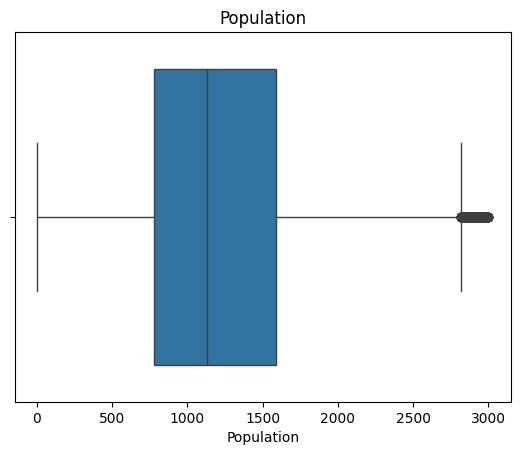

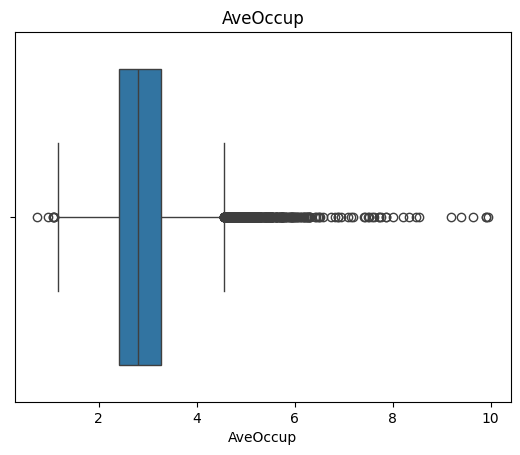

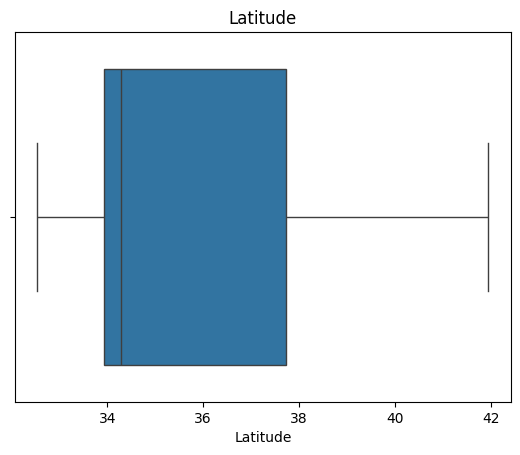

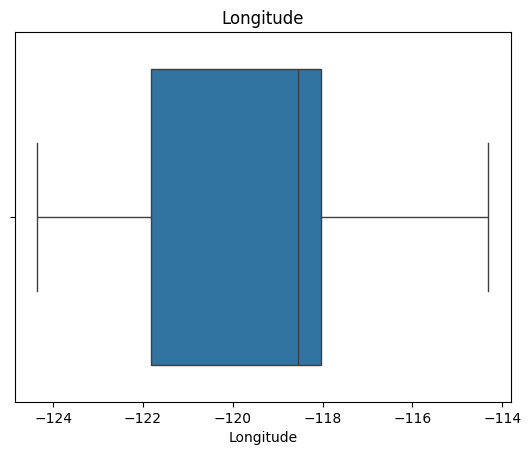

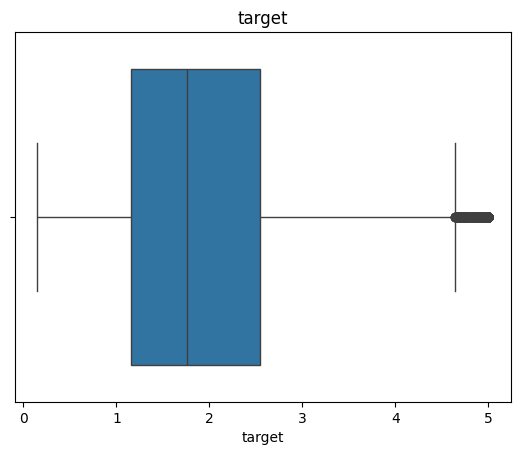

In [ ]:
for column in housing_df.columns:
    plt.figure()  # Create a new figure for each plot
    sns.boxplot(x=housing_df[column])
    plt.title(column)
    plt.show()

In [ ]:
housing_df.count()

,0
MedInc,18468
HouseAge,18468
AveRooms,18468
AveBedrms,18468
Population,18468
AveOccup,18468
Latitude,18468
Longitude,18468
target,18468


# spliting the data to train & test

In [ ]:
X = housing_df.drop('target', axis=1)
y = housing_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying linear regression model to it

In [ ]:

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 0.44367741917379694
Root Mean Squared Error: 0.6660911492985002
R-squared: 0.6006571915276595


In [ ]:
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive RMSE
rmse_scores = (-scores)**0.5

print("Cross-Validation RMSE Scores:", rmse_scores)
print("Average RMSE:", rmse_scores.mean())

Cross-Validation RMSE Scores: [0.64872068 0.71851868 0.74647145 0.71445925 0.65885373]
Average RMSE: 0.697404759525174


# Applying decision tree model to it

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 0.5134256338686248
Root Mean Squared Error: 0.7165372522546367
R-squared: 0.5378785899165335


In [ ]:
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive RMSE
rmse_scores = (-scores)**0.5

print("Cross-Validation RMSE Scores:", rmse_scores)
print("Average RMSE:", rmse_scores.mean())

Cross-Validation RMSE Scores: [1.04308672 0.81699749 0.8974197  1.02425482 0.8912767 ]
Average RMSE: 0.9346070857899681


# Applying random forest model to it

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 0.25666301393351315
Root Mean Squared Error: 0.5066192001232416
R-squared: 0.7689841213779808


In [ ]:
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive RMSE
rmse_scores = (-scores)**0.5

print("Cross-Validation RMSE Scores:", rmse_scores)
print("Average RMSE:", rmse_scores.mean())

Cross-Validation RMSE Scores: [0.69940564 0.60747625 0.63657077 0.67321029 0.69110589]
Average RMSE: 0.6615537649871956


# Applying gradient boost model to it

In [ ]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 0.28553687498706903
Root Mean Squared Error: 0.534356505515811
R-squared: 0.7429954902999354


In [ ]:
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive RMSE
rmse_scores = (-scores)**0.5

print("Cross-Validation RMSE Scores:", rmse_scores)
print("Average RMSE:", rmse_scores.mean())

Cross-Validation RMSE Scores: [0.65811669 0.6172054  0.66592488 0.65550029 0.67576329]
Average RMSE: 0.6545021099944306


# Applying knn model to it

In [ ]:
model = KNeighborsRegressor(n_neighbors=20)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=20)

In [ ]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 1.0199888847574587
Root Mean Squared Error: 1.0099449909561702
R-squared: 0.08193383695721301


In [ ]:
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive RMSE
rmse_scores = (-scores)**0.5

print("Cross-Validation RMSE Scores:", rmse_scores)
print("Average RMSE:", rmse_scores.mean())

Cross-Validation RMSE Scores: [0.99277907 1.01017047 1.1470396  1.06194161 1.11910328]
Average RMSE: 1.066206807724104
